## Testing for curvature 

This notebook shows how to test for spectral curvature in a source.  It also details how to reload data from a fermipy save file.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
from fermipy.gtanalysis import GTAnalysis

## Load the old anlaysis

This is the save file from where we left off.

In [3]:
gta = GTAnalysis.create('data/fit2_sed.npy')

2022-05-25 17:03:46 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.1+5.ga1de.dirty 
ScienceTools version 2.1.19
2022-05-25 17:03:47 INFO    GTAnalysis.setup(): Running setup.
2022-05-25 17:03:47 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2022-05-25 17:03:47 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2022-05-25 17:03:47 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
/Users/hfleisc1/mambaforge/envs/fermi-21/lib/python3.9/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/Users/hfleisc1/mambaforge/envs/fermi-21/lib/python3.9/site-packages/fermipy/irfs.py:52: 

Drm_Cache::update Measured counts < 0 4FGL J1221.4-0634 23 -3.16963e-12 5.8433e-12
0.57141 0.63714 0.627586 0.554603 0.444619 0.330903 0.219693 0.132171 0.0712835 0.032272 0.0133772 0.00410797 0.00140145 0.00031844 9.72625e-05 2.14837e-05 6.37548e-06 1.5398e-06 4.17718e-07 8.85368e-08 1.37222e-08 1.48829e-09 1.23325e-10 5.8433e-12 


2022-05-25 17:03:58 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 02.
2022-05-25 17:04:02 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 03.
2022-05-25 17:04:10 INFO    GTAnalysis.setup(): Finished setup.
2022-05-25 17:04:10 INFO    GTAnalysis.load_roi(): Loading ROI file: /Users/hfleisc1/fermi_software/summer2022/fermi-summer-school/Likelihood_Advanced/data/fit2_sed.npy
2022-05-25 17:04:10 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2022-05-25 17:04:14 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 01.
2022-05-25 17:04:19 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 02.
2022-05-25 17:04:23 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 03.
2022-05-25 17:04:30 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [4]:
gta.print_roi()

2022-05-25 17:04:30 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1256.1-0547   PointSource    PLSuperExpCuto    0.000  13258.48      7521.9
4FGL J1243.9-0218   PointSource    LogParabola       4.627     11.89        38.6
4FGL J1315.9-0732   PointSource    LogParabola       5.216     17.13        37.1
4FGL J1234.7-0434   PointSource    PowerLaw          5.469      4.19        26.1
4FGL J1256.2-1146   PointSource    PowerLaw          5.987     35.76        87.0
4FGL J1322.3-0606   PointSource    LogParabola       6.518     11.59        18.7
4FGL J1233.7-0144   PointSource    PowerLaw          6.904     28.03       107.1
4FGL J1310.2-1158   PointSource    PowerLaw          7.100     14.79        47.8
4FGL J1311.0+0034   PointSource    PowerLaw          7.357     24.23        77.5
4FGL J1322.6-0936   PointSource    LogParabola       7.5

In [5]:
all_pars = ['Prefactor', 'IndexS', 'ExpfactorS', 'Index2' ]
gta.free_source("4FGL J1256.1-0547", pars=all_pars)

fit = gta.fit()

2022-05-25 17:04:30 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1256.1-0547     : ['Prefactor', 'IndexS', 'ExpfactorS', 'Index2']
2022-05-25 17:04:30 INFO    GTAnalysis.fit(): Starting fit.
2022-05-25 17:04:31 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2022-05-25 17:04:31 INFO    GTAnalysis.fit(): LogLike:  -138379.441 DeltaLogLike:        0.570 


In [6]:
fit

{'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'dloglike': 0.5696872192202136,
 'edm': 0.00031474597279662663,
 'loglike': -138379.44135239255,
 'covariance': array([[ 0.00019625, -0.00013119,  0.00154697, -0.00088505],
        [-0.00013119,  0.00088234,  0.00181946,  0.00682883],
        [ 0.00154697,  0.00181946,  0.0483788 , -0.0010857 ],
        [-0.00088505,  0.00682883, -0.0010857 ,  0.08161676]]),
 'correlation': array([[ 1.        , -0.31526166,  0.50205117, -0.22114195],
        [-0.31526166,  1.        ,  0.27848278,  0.80471005],
        [ 0.50205117,  0.27848278,  1.        , -0.01727797],
        [-0.22114195,  0.80471005, -0.01727797,  1.        ]]),
 'values': array([ 0.59832289,  2.24998445,  1.36933015, -0.05060562]),
 'errors': array([0.01400895, 0.02970413, 0.21995182, 0.28568647]),
 'indices': array([19, 20, 22, 23]),
 'is_norm': array([ True, False, False, False]),
 'src_names': ['4FGL J1256.1-0547',
  '4FGL J1256.1-0547',
  '4FGL J1256.1-0547',
  '4FG

## Load the SED

We calculated the SED before.

In [7]:
c = np.load('data/fit2_sed.npy', allow_pickle = True).flat[0]

In [8]:
E = np.array(c['sources']['4FGL J1256.1-0547']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J1256.1-0547']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['4FGL J1256.1-0547']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J1256.1-0547']['model_flux']['dnde_lo'])

In [9]:
sed = np.load('data/4fgl_j1256.1-0547_sed.npy', allow_pickle=True).flat[0]

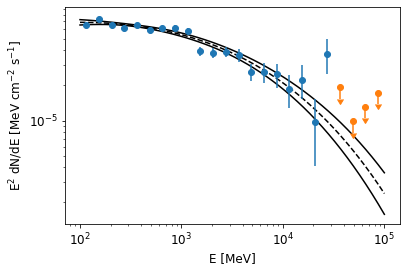

In [10]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(sed['e_ctr'][:-4],
             sed['e2dnde'][:-4], 
             yerr=sed['e2dnde_err'][:-4], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-4:]),
         sed['e2dnde_ul95'][-4:], yerr=0.2*sed['e2dnde_ul95'][-4:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

Let's look at the parameter values as well:

In [11]:
source = gta.roi.get_source_by_name('4FGL J1256.1-0547')
print(source)

Name           : 4FGL J1256.1-0547
Associations   : ['4FGL J1256.1-0547', '3C 279', '2AGL J1255-0543', '3EG J1255-0549']
RA/DEC         :    194.042/    -5.789
GLON/GLAT      :    305.095/    57.063
TS             : 15231.41
Npred          : 7515.70
Flux           : 6.348e-07 +/- 3.95e-08
EnergyFlux     :  0.000258 +/- 8.31e-06
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff4
Spectral Parameters
b'Prefactor'   :  5.983e-11 +/-  1.401e-12
b'IndexS'      :      -2.25 +/-     0.0297
b'Scale'       :      954.1 +/-        nan
b'ExpfactorS'  :     0.1369 +/-      0.022
b'Index2'      :   -0.05061 +/-     0.2857


## Alternative model: PL spectrum

Now, we'll change the spectral type to a PL spectrum. This can be done for example by removing the source and adding another one with the same name and coordinates, but PL spectrum. 

In [12]:

src_orig = gta.delete_source('4FGL J1256.1-0547')
#src_orig = gta.roi["4FGL J1256.1-0547"]
print(src_orig.params["Scale"])

2022-05-25 17:04:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1256.1-0547


{'value': 954.1499023, 'error': nan}


In [13]:
gta.add_source(src_orig['name'],{ 'ra' : src_orig['ra'], 'dec' : src_orig['dec'],
                 'SpectrumType' : 'PowerLaw', 'Index' : 2.0,
                 'Scale' : src_orig.params["Scale"], 'Prefactor' : 1e-11,
                 'SpatialModel' : 'PointSource' })

#pars0 = {
#                'Prefactor': src_orig.params["Prefactor"],
#                'Index':
#                    {'value': 2.0, 'scale': -1.0, 'min': 0.0,
#                        'max': 5.0, 'free': False},
#                'Scale': src_orig.params["Scale"],
#}

#gta.set_source_spectrum("4FGL J1256.1-0547", 'PowerLaw',
#                                     spectrum_pars=pars0,
#                                     update_source=False)


2022-05-25 17:04:32 INFO    GTAnalysis.add_source(): Adding source 4FGL J1256.1-0547


In [14]:
gta.print_roi()

2022-05-25 17:04:40 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1256.1-0547   PointSource    PowerLaw          0.000       nan      1144.9
4FGL J1243.9-0218   PointSource    LogParabola       4.627     11.89        38.6
4FGL J1315.9-0732   PointSource    LogParabola       5.216     17.13        37.1
4FGL J1234.7-0434   PointSource    PowerLaw          5.469      4.19        26.1
4FGL J1256.2-1146   PointSource    PowerLaw          5.987     35.76        87.0
4FGL J1322.3-0606   PointSource    LogParabola       6.518     11.59        18.7
4FGL J1233.7-0144   PointSource    PowerLaw          6.904     28.03       107.1
4FGL J1310.2-1158   PointSource    PowerLaw          7.100     14.79        47.8
4FGL J1311.0+0034   PointSource    PowerLaw          7.357     24.23        77.5
4FGL J1322.6-0936   PointSource    LogParabola       7.5

In [15]:
gta.free_source('4FGL J1256.1-0547', pars=['Prefactor','Index'])

2022-05-25 17:04:40 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1256.1-0547     : ['Index']


In [16]:
fit2 = gta.fit()

2022-05-25 17:04:40 INFO    GTAnalysis.fit(): Starting fit.
2022-05-25 17:04:40 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2022-05-25 17:04:40 INFO    GTAnalysis.fit(): LogLike:  -138395.687 DeltaLogLike:     3141.036 


In [17]:
fit2

{'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'dloglike': 3141.0361173144775,
 'edm': 4.6429433050384375e-07,
 'loglike': -138395.68718150764,
 'covariance': array([[ 0.01054994, -0.00094055],
        [-0.00094055,  0.00020173]]),
 'correlation': array([[ 1.        , -0.64472351],
        [-0.64472351,  1.        ]]),
 'values': array([5.30444528, 2.22407481]),
 'errors': array([0.10271292, 0.01420304]),
 'indices': array([19, 20]),
 'is_norm': array([ True, False]),
 'src_names': ['4FGL J1256.1-0547', '4FGL J1256.1-0547'],
 'par_names': ['Prefactor', 'Index'],
 'config': {'optimizer': 'MINUIT',
  'tol': 0.001,
  'max_iter': 100,
  'init_lambda': 0.0001,
  'retries': 3,
  'min_fit_quality': 2,
  'verbosity': 0,
  'covar': True,
  'reoptimize': False},
 'niter': 1}

In [18]:
gta.print_roi()

2022-05-25 17:04:40 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1256.1-0547   PointSource    PowerLaw          0.000  15198.92      7592.3
4FGL J1243.9-0218   PointSource    LogParabola       4.627     11.89        38.6
4FGL J1315.9-0732   PointSource    LogParabola       5.216     17.13        37.1
4FGL J1234.7-0434   PointSource    PowerLaw          5.469      4.19        26.1
4FGL J1256.2-1146   PointSource    PowerLaw          5.987     35.76        87.0
4FGL J1322.3-0606   PointSource    LogParabola       6.518     11.59        18.7
4FGL J1233.7-0144   PointSource    PowerLaw          6.904     28.03       107.1
4FGL J1310.2-1158   PointSource    PowerLaw          7.100     14.79        47.8
4FGL J1311.0+0034   PointSource    PowerLaw          7.357     24.23        77.5
4FGL J1322.6-0936   PointSource    LogParabola       7.5

In [19]:
source = gta.roi.get_source_by_name('4FGL J1256.1-0547')

In [20]:
print(source)

Name           : 4FGL J1256.1-0547
Associations   : ['4FGL J1256.1-0547']
RA/DEC         :    194.042/    -5.789
GLON/GLAT      :    305.095/    57.063
TS             : 15198.92
Npred          : 7592.29
Flux           : 6.543e-07 +/-  1.1e-08
EnergyFlux     : 0.0002813 +/- 6.41e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  5.304e-11 +/-  1.027e-12
b'Index'       :     -2.224 +/-     0.0142
b'Scale'       :      954.1 +/-        nan


In [21]:
E = np.array(source['model_flux']['energies'])
dnde = np.array(source['model_flux']['dnde'])
dnde_hi = np.array(source['model_flux']['dnde_hi'])
dnde_lo = np.array(source['model_flux']['dnde_lo'])

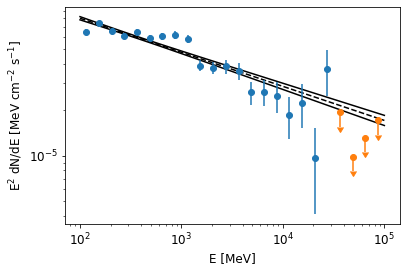

In [22]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(sed['e_ctr'][:-4],
             sed['e2dnde'][:-4], 
             yerr=sed['e2dnde_err'][:-4], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-4:]),
         sed['e2dnde_ul95'][-4:], yerr=0.2*sed['e2dnde_ul95'][-4:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

## Likelihood ratio test

In [23]:
TS = -2*(fit2['loglike'] - fit['loglike'])
print(fit['loglike'])
print(fit2['loglike'])

-138379.44135239255
-138395.68718150764


In [24]:
TS

32.49165823019575

Is this significant?

## Quicker way...

In [25]:
gta.curvature("4FGL J1256.1-0547", Index2=0.6667, free_Index2=True)

2022-05-25 17:04:42 INFO    GTAnalysis.curvature(): LogLike_PL:  -138395.687 LogLike_LP:  -138380.159 LogLike_PLSC:  -138382.132 LogLike_PLSC_free:  -138380.187
2022-05-25 17:04:42 INFO    GTAnalysis.curvature(): TS_curv:        31.056 (LP)
2022-05-25 17:04:42 INFO    GTAnalysis.curvature(): TS_curv:        27.110 (PLSC, Index2 = 0.667)
2022-05-25 17:04:42 INFO    GTAnalysis.curvature(): TS_curv:        31.000 (PLSC, free Index2)


MutableNamedTuple([('ts_curv', 31.055959390301723),
                   ('lp_ts_curv', 31.055959390301723),
                   ('ple_ts_curv', 27.10975711856736),
                   ('ple_free_ts_curv', 30.999850026506465),
                   ('loglike_pl', -138395.6871814222),
                   ('loglike_lp', -138380.15920172705),
                   ('loglike_ple', -138382.1323028629),
                   ('loglike_ple_free', -138380.18725640894)])

In [26]:
help(gta.curvature)

Help on method curvature in module fermipy.gtanalysis:

curvature(name, **kwargs) method of fermipy.gtanalysis.GTAnalysis instance
    Test whether a source shows spectral curvature by comparing
    the likelihood ratio of PowerLaw and LogParabola spectral
    models.
    
    Parameters
    ----------
    name : str
        Source name.
        
    Index2: double
        Exponent for super-exponential cutoff PL test. Default: 2/3
        
    free_Index2: bool
        Test also super-exponential cutoff PL with free index.
        Only recommended for sources with high TS.

